In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from reComBat import reComBat


In [2]:
technology = "microarray" # "RNAseq"
#technology = "RNAseq" #microarray

In [3]:

# Assuming your DataFrame is called cts and has gene expression data
# Assuming cts is a pandas DataFrame with gene expression data
if technology == "microarray":
    cts = pd.read_csv("/home/karen/Documents/phd/Data/trainign_dataset_51270_microarray_unadjusted.csv")
elif technology == "RNAseq":
    cts = pd.read_csv("/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/RNAseq_All_abundances_unadjusted.csv")

metadata =   cts[["Experiment", "Sample", "Age"]]


/tmp/ipykernel_39669/3142307427.py:4: DtypeWarning: Columns (51280) have mixed types. Specify dtype option on import or set low_memory=False.
  cts = pd.read_csv("/home/karen/Documents/phd/Data/trainign_dataset_51270_microarray_unadjusted.csv")


In [4]:
metadata

,Experiment,Sample,Age
0,GSE13070,GSM342608,52.50
1,GSE13070,GSM342609,50.60
2,GSE13070,GSM342610,56.08
3,GSE13070,GSM342611,54.84
4,GSE13070,GSM342614,51.14
...,...,...,...
772,GSE9676,GSM244612,65.10
773,GSE9676,GSM244613,68.40
774,GSE9676,GSM244614,65.90
775,GSE9676,GSM244615,67.30


# Function

In [5]:
import matplotlib.pyplot as plt

def generate_colors(n):
        colormap = plt.cm.get_cmap('tab20', n)
        colors = [colormap(i) for i in range(n)]
        return colors
    
def blot_expression(subset_data, experiments, count_experiments, colors=None, title=None, save=False):
    
    if colors is None:
        colors = generate_colors(len(experiments))
    colored = np.sum(list(count_experiments.values()))
    if len(subset_data.columns) != colored:
        raise "the columns and the experiments should be same length"
        return None
    if len(count_experiments) != len(experiments):
        raise "the count_experiments and the experiments should be same length"
        return None
    if title is None:
        title = 'Expression of Gene Expression Across Experiments'
    boxes=[]
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))
    start_c = 0
    end_c = len(subset_data.columns)
    color_i = 0
    for exp in experiments:
        end_c=start_c + count_experiments[exp]
        # Boxplot for the first 84 columns
        box= ax.boxplot(subset_data.iloc[:, start_c:end_c], positions=list(range(start_c+1,end_c+1)), showfliers=False, patch_artist=True,
                          boxprops=dict(facecolor=colors[color_i], color=colors[color_i])
                          )
        start_c = end_c
        boxes.append(box)
        color_i=color_i+1
                          
    
    # Set labels and titles
    ax.set_title(title)
    ax.set_ylabel('Expression')
    
    # Adjust legend
    legends_list = [b["boxes"][0] for b in boxes]
    ax.legend(legends_list, experiments)
    
    plt.tight_layout()
    if save:
        plt.savefig(save)
    plt.show()


In [6]:
cts

,Sample,U48705,M87338,X51757,X69699,L36861,L13852,X55005,X79510,M21121,...,AI571298,AA149545,C18318,AI219073,AI205180,AI363375,Experiment,Sex,Age,Status
0,GSM342608,870.599976,500.399994,165.000000,900.900024,67.400002,346.600006,255.300003,58.000000,70.800003,...,341.000000,2384.300049,101.699997,59.500000,159.399994,233.000000,GSE13070,Male,52.50,IRd
1,GSM342609,1635.300049,390.899994,252.199997,795.000000,108.300003,623.000000,260.500000,76.400002,4.200000,...,292.399994,3852.000000,70.699997,32.700001,155.899994,383.200012,GSE13070,Male,50.60,IRd
2,GSM342610,1006.799988,383.200012,198.199997,924.000000,129.399994,649.599976,192.800003,40.700001,16.200001,...,263.799988,2043.599976,165.000000,94.099998,220.100006,399.100006,GSE13070,Male,56.08,IRd � TZD
3,GSM342611,1215.800049,496.200012,160.600006,500.899994,18.799999,345.299988,257.600006,23.400000,41.500000,...,238.100006,2176.800049,93.599998,21.799999,183.899994,483.899994,GSE13070,Male,54.84,IRd � TZD
4,GSM342614,823.599976,561.500000,305.500000,1214.099976,81.300003,494.399994,208.199997,63.799999,79.199997,...,223.899994,2341.699951,142.600006,79.699997,341.299988,397.399994,GSE13070,Male,51.14,IRd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,GSM244612,1316.250000,1582.450000,11268.600000,7065.080000,6376.640000,1996.200000,10128.300000,7015.010000,235.884000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,65.10,NaN
773,GSM244613,966.504000,889.863000,9753.840000,4753.410000,6072.460000,1229.210000,6264.000000,5658.760000,335.332000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,68.40,NaN
774,GSM244614,1382.900000,1278.390000,11248.800000,7119.220000,6891.120000,1431.700000,8131.630000,6416.350000,432.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,65.90,NaN
775,GSM244615,1498.540000,1276.440000,10965.900000,6940.470000,7879.880000,1917.330000,7469.210000,6153.410000,440.064000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,67.30,NaN


In [7]:
sample_order = cts["Sample"].tolist()  # Get the order of samples in cts
experiment_order = cts["Experiment"].tolist() 
age_order = cts["Age"].tolist()


In [8]:
df =pd.DataFrame(experiment_order)
count_experiments = dict(df[0].value_counts())
count_experiments
experiments = list(count_experiments)
experiments

['GSE13070',
 'GSE47969',
 'GSE48278',
 'GSE9103',
 'GSE59880',
 'GSE9676',
 'GSE161643',
 'GSE8157',
 'GSE1428',
 'GSE38718',
 'GSE6348',
 'GSE40551',
 'GSE87105',
 'GSE674_2']

In [9]:
def map_to_category(age):
    if age <= 35:
        return "Young"
    elif age > 65:
        return "Old"
    else:
        return "MiddleAge"

# Map values in age_order to categories
age_order = [map_to_category(age) for age in age_order]

In [10]:
cts

,Sample,U48705,M87338,X51757,X69699,L36861,L13852,X55005,X79510,M21121,...,AI571298,AA149545,C18318,AI219073,AI205180,AI363375,Experiment,Sex,Age,Status
0,GSM342608,870.599976,500.399994,165.000000,900.900024,67.400002,346.600006,255.300003,58.000000,70.800003,...,341.000000,2384.300049,101.699997,59.500000,159.399994,233.000000,GSE13070,Male,52.50,IRd
1,GSM342609,1635.300049,390.899994,252.199997,795.000000,108.300003,623.000000,260.500000,76.400002,4.200000,...,292.399994,3852.000000,70.699997,32.700001,155.899994,383.200012,GSE13070,Male,50.60,IRd
2,GSM342610,1006.799988,383.200012,198.199997,924.000000,129.399994,649.599976,192.800003,40.700001,16.200001,...,263.799988,2043.599976,165.000000,94.099998,220.100006,399.100006,GSE13070,Male,56.08,IRd � TZD
3,GSM342611,1215.800049,496.200012,160.600006,500.899994,18.799999,345.299988,257.600006,23.400000,41.500000,...,238.100006,2176.800049,93.599998,21.799999,183.899994,483.899994,GSE13070,Male,54.84,IRd � TZD
4,GSM342614,823.599976,561.500000,305.500000,1214.099976,81.300003,494.399994,208.199997,63.799999,79.199997,...,223.899994,2341.699951,142.600006,79.699997,341.299988,397.399994,GSE13070,Male,51.14,IRd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,GSM244612,1316.250000,1582.450000,11268.600000,7065.080000,6376.640000,1996.200000,10128.300000,7015.010000,235.884000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,65.10,NaN
773,GSM244613,966.504000,889.863000,9753.840000,4753.410000,6072.460000,1229.210000,6264.000000,5658.760000,335.332000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,68.40,NaN
774,GSM244614,1382.900000,1278.390000,11248.800000,7119.220000,6891.120000,1431.700000,8131.630000,6416.350000,432.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,65.90,NaN
775,GSM244615,1498.540000,1276.440000,10965.900000,6940.470000,7879.880000,1917.330000,7469.210000,6153.410000,440.064000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,67.30,NaN


In [11]:



cts_processed = cts.copy()

if technology == "microarray":
    cts_processed.drop(['Age', 'Sex', 'Status', 'Experiment'], axis=1, inplace=True)
elif technology == "RNAseq":
    cts_processed.drop(['Age', 'Sample.1', 'Experiment'], axis=1, inplace=True)

samples=cts_processed["Sample"]
cts_processed.set_index("Sample",  inplace=True)
gene_columns= cts_processed.columns


In [12]:
data = cts_processed.T
data

Sample,GSM342608,GSM342609,GSM342610,GSM342611,GSM342614,GSM342615,GSM342616,GSM342617,GSM342620,GSM342621,...,GSM244607,GSM244608,GSM244609,GSM244610,GSM244611,GSM244612,GSM244613,GSM244614,GSM244615,GSM244616
U48705,870.599976,1635.300049,1006.799988,1215.800049,823.599976,1174.000000,871.799988,1531.000000,837.700012,1026.400024,...,893.719,1307.66,1167.92,962.987,1098.29,1316.25,966.504,1382.90,1498.54,1127.14
M87338,500.399994,390.899994,383.200012,496.200012,561.500000,544.400024,511.100006,409.700012,352.100006,604.299988,...,1195.870,1416.94,1721.65,1196.380,1544.92,1582.45,889.863,1278.39,1276.44,1247.63
X51757,165.000000,252.199997,198.199997,160.600006,305.500000,239.899994,273.600006,121.099998,140.500000,211.600006,...,10278.600,10395.10,10960.90,11494.600,12586.50,11268.60,9753.840,11248.80,10965.90,11196.30
X69699,900.900024,795.000000,924.000000,500.899994,1214.099976,609.299988,531.000000,652.599976,821.000000,570.700012,...,5435.160,6138.75,8321.32,8694.850,7740.13,7065.08,4753.410,7119.22,6940.47,4809.99
L36861,67.400002,108.300003,129.399994,18.799999,81.300003,9.600000,83.300003,17.200001,12.900000,81.500000,...,6007.200,7298.46,6727.35,6784.570,6309.06,6376.64,6072.460,6891.12,7879.88,6443.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AA149545,2384.300049,3852.000000,2043.599976,2176.800049,2341.699951,3027.199951,2351.600098,2876.600098,2640.500000,2613.000000,...,0.000,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.00,0.00
C18318,101.699997,70.699997,165.000000,93.599998,142.600006,111.800003,12.000000,146.100006,101.199997,64.500000,...,0.000,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.00,0.00
AI219073,59.500000,32.700001,94.099998,21.799999,79.699997,46.400002,34.299999,58.799999,15.000000,109.800003,...,0.000,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.00,0.00
AI205180,159.399994,155.899994,220.100006,183.899994,341.299988,371.600006,311.200012,347.899994,517.200012,303.799988,...,0.000,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.00,0.00


In [13]:
cts_processed.columns

Index(['U48705', 'M87338', 'X51757', 'X69699', 'L36861', 'L13852', 'X55005',
       'X79510', 'M21121', 'J02843',
       ...
       'AW050627', 'AI654857', 'W22117', 'AI028241', 'AI571298', 'AA149545',
       'C18318', 'AI219073', 'AI205180', 'AI363375'],
      dtype='object', length=51276)

In [14]:
#!pip install combat

In [15]:
experiment_order= pd.Series(experiment_order)


In [16]:
experiment_order

0      GSE13070
1      GSE13070
2      GSE13070
3      GSE13070
4      GSE13070
         ...   
772     GSE9676
773     GSE9676
774     GSE9676
775     GSE9676
776     GSE9676
Length: 777, dtype: object

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cts_processed = scaler.fit_transform(cts_processed.T)

In [18]:
cts_processed=pd.DataFrame(cts_processed, columns=samples)


In [19]:

data = (data - data.mean()) / data.std()

data.fillna(0, inplace=True)

In [20]:
data


Sample,GSM342608,GSM342609,GSM342610,GSM342611,GSM342614,GSM342615,GSM342616,GSM342617,GSM342620,GSM342621,...,GSM244607,GSM244608,GSM244609,GSM244610,GSM244611,GSM244612,GSM244613,GSM244614,GSM244615,GSM244616
U48705,-0.033316,0.128273,-0.005143,0.041898,-0.045441,0.036097,-0.034888,0.123973,-0.038962,-0.000781,...,1.332007,1.491765,1.414029,1.203855,1.439363,1.654361,1.366513,1.855412,1.904116,1.410480
M87338,-0.098850,-0.129063,-0.122543,-0.105963,-0.086413,-0.097475,-0.102464,-0.128491,-0.135905,-0.088114,...,1.812566,1.623780,2.126791,1.515804,2.061882,2.006616,1.251102,1.707939,1.607301,1.570656
X51757,-0.158223,-0.157746,-0.157371,-0.174921,-0.126432,-0.162076,-0.146959,-0.193470,-0.178148,-0.169364,...,16.258266,12.469785,14.019554,15.280249,17.451798,14.824014,14.599108,15.777078,14.556318,14.796096
X69699,-0.027952,-0.045497,-0.020731,-0.104997,0.015604,-0.083706,-0.098736,-0.073801,-0.042296,-0.095066,...,8.554978,7.327930,10.621886,11.538145,10.696857,9.261620,7.069105,9.949872,9.176724,6.306342
L36861,-0.175501,-0.187504,-0.170323,-0.204058,-0.161480,-0.210934,-0.182612,-0.216864,-0.203621,-0.196282,...,9.464784,8.728910,8.570128,8.984894,8.702210,8.350627,9.055424,9.628003,10.432154,8.477465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AA149545,0.234644,0.586676,0.190047,0.239362,0.191875,0.429259,0.242350,0.426939,0.320940,0.327490,...,-0.089415,-0.087945,-0.089317,-0.083259,-0.091450,-0.087394,-0.088917,-0.095984,-0.098536,-0.087903
C18318,-0.169429,-0.195279,-0.163621,-0.188688,-0.151897,-0.189252,-0.195969,-0.187841,-0.185993,-0.199800,...,-0.089415,-0.087945,-0.089317,-0.083259,-0.091450,-0.087394,-0.088917,-0.095984,-0.098536,-0.087903
AI219073,-0.176899,-0.203137,-0.176969,-0.203442,-0.161730,-0.203127,-0.191792,-0.207497,-0.203202,-0.190427,...,-0.089415,-0.087945,-0.089317,-0.083259,-0.091450,-0.087394,-0.088917,-0.095984,-0.098536,-0.087903
AI205180,-0.159215,-0.177660,-0.153248,-0.170134,-0.120836,-0.134135,-0.139915,-0.142406,-0.102945,-0.150288,...,-0.089415,-0.087945,-0.089317,-0.083259,-0.091450,-0.087394,-0.088917,-0.095984,-0.098536,-0.087903


In [21]:
cts_processed.index=gene_columns
cts_processed=cts_processed.T
cts_processed

,U48705,M87338,X51757,X69699,L36861,L13852,X55005,X79510,M21121,J02843,...,AW050627,AI654857,W22117,AI028241,AI571298,AA149545,C18318,AI219073,AI205180,AI363375
Sample,,,,,,,,,,,,,,,,,,,,,
GSM342608,-0.033316,-0.098851,-0.158225,-0.027953,-0.175503,-0.126077,-0.142240,-0.177167,-0.174901,-0.157694,...,-0.098886,-0.031900,-0.184850,-0.118837,-0.127069,0.234646,-0.169431,-0.176901,-0.159216,-0.146187
GSM342609,0.128274,-0.129065,-0.157747,-0.045498,-0.187506,-0.081067,-0.156031,-0.194102,-0.209033,-0.170279,...,-0.169018,-0.070851,-0.193689,-0.094757,-0.149434,0.586681,-0.195281,-0.203139,-0.177662,-0.130657
GSM342610,-0.005143,-0.122544,-0.157372,-0.020731,-0.170325,-0.072390,-0.158389,-0.187024,-0.191636,-0.182355,...,-0.152082,-0.113093,-0.190526,-0.080900,-0.145022,0.190049,-0.163623,-0.176971,-0.153249,-0.119550
GSM342611,0.041899,-0.105964,-0.174923,-0.104998,-0.204060,-0.136971,-0.154991,-0.203115,-0.199396,-0.181786,...,-0.201286,-0.090307,-0.184211,-0.098382,-0.158998,0.239365,-0.188690,-0.203444,-0.170135,-0.108492
GSM342614,-0.045441,-0.086414,-0.126433,0.015604,-0.161482,-0.096903,-0.141644,-0.164217,-0.161810,-0.151524,...,-0.026901,-0.032794,-0.172722,-0.083397,-0.139190,0.191877,-0.151899,-0.161732,-0.120837,-0.112067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM244612,1.654377,2.006635,14.824159,9.261710,8.350709,2.554144,13.315219,9.195453,0.224747,3.219094,...,-0.087395,-0.087395,-0.087395,-0.087395,-0.087395,-0.087395,-0.087395,-0.087395,-0.087395,-0.087395
GSM244613,1.366526,1.251114,14.599250,7.069174,9.055513,1.762132,9.343950,8.432528,0.416054,2.568473,...,-0.088918,-0.088918,-0.088918,-0.088918,-0.088918,-0.088918,-0.088918,-0.088918,-0.088918,-0.088918
GSM244614,1.855430,1.707956,15.777232,9.949969,9.628096,1.924292,11.378584,8.958147,0.514685,3.004858,...,-0.095984,-0.095984,-0.095984,-0.095984,-0.095984,-0.095984,-0.095984,-0.095984,-0.095984,-0.095984


In [22]:
cts_processed.fillna(0, inplace=True)

In [23]:
experiment_order

0      GSE13070
1      GSE13070
2      GSE13070
3      GSE13070
4      GSE13070
         ...   
772     GSE9676
773     GSE9676
774     GSE9676
775     GSE9676
776     GSE9676
Length: 777, dtype: object

In [24]:
combat = reComBat()
combat.fit(cts_processed,experiment_order)
data_corrected = combat.transform(cts_processed,experiment_order)

[reComBat] 2024-05-13 11:03:39,067 Starting to fot reComBat.
[reComBat] 2024-05-13 11:03:39,092 Fit the linear model.
[reComBat] 2024-05-13 11:03:41,289 Starting the empirical parametric optimisation.
[reComBat] 2024-05-13 11:03:43,208 Optimisation finished.
[reComBat] 2024-05-13 11:03:43,208 reComBat is fitted.
[reComBat] 2024-05-13 11:03:43,210 Starting to transform.
[reComBat] 2024-05-13 11:03:44,045 Transform finished.


In [25]:
data_corrected.index



Index(['GSM342608', 'GSM342609', 'GSM342610', 'GSM342611', 'GSM342614',
       'GSM342615', 'GSM342616', 'GSM342617', 'GSM342620', 'GSM342621',
       ...
       'GSM244607', 'GSM244608', 'GSM244609', 'GSM244610', 'GSM244611',
       'GSM244612', 'GSM244613', 'GSM244614', 'GSM244615', 'GSM244616'],
      dtype='object', name='Sample', length=777)

In [26]:
metadata.columns

Index(['Experiment', 'Sample', 'Age'], dtype='object')

In [27]:
colors=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive']

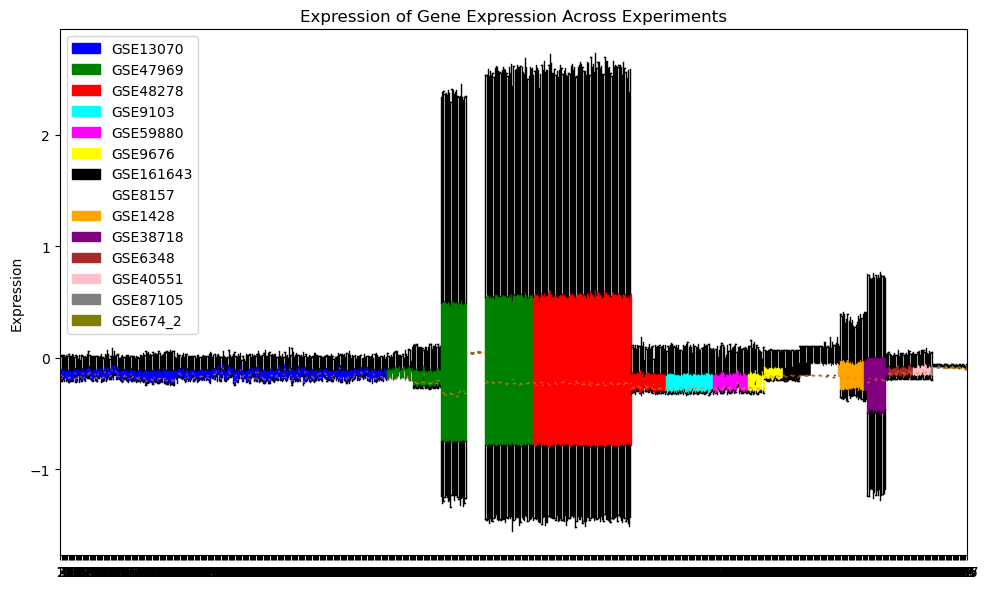

In [28]:

blot_expression(data, experiments, count_experiments, colors=colors, save=f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_unalteraded__reCombat.png")



In [29]:
# with standar norm
data_corrected

,U48705,M87338,X51757,X69699,L36861,L13852,X55005,X79510,M21121,J02843,...,AW050627,AI654857,W22117,AI028241,AI571298,AA149545,C18318,AI219073,AI205180,AI363375
Sample,,,,,,,,,,,,,,,,,,,,,
GSM342608,-1.932922,0.184247,0.007480,-0.124343,0.719133,-0.321052,0.280277,0.204439,0.205784,0.422185,...,0.336861,0.283832,0.132968,-0.205033,0.102265,-0.326898,0.223452,0.122180,-0.122646,-0.139711
GSM342609,0.914609,-1.231138,0.040869,-0.585964,-0.027564,0.774299,-0.617545,-0.853704,-0.498989,-0.002508,...,-0.291156,-0.140498,-0.073595,0.044458,-0.052426,0.809303,-0.241475,-0.186364,-0.213463,-0.023862
GSM342610,-1.436446,-0.925659,0.067085,0.065661,1.041235,0.985451,-0.771055,-0.411442,-0.139777,-0.410001,...,-0.139500,-0.600676,0.000324,0.188031,-0.021912,-0.470836,0.327909,0.121363,-0.093268,0.058989
GSM342611,-0.607485,-0.148975,-1.159882,-2.151431,-1.057409,-0.586154,-0.549872,-1.416797,-0.299991,-0.390801,...,-0.580113,-0.352444,0.147899,0.006900,-0.118577,-0.311669,-0.122933,-0.189940,-0.176405,0.141482
GSM342614,-2.146581,0.766864,2.230043,1.021641,1.591373,0.388909,0.319061,1.013511,0.476085,0.630400,...,0.981481,0.274092,0.416388,0.162158,0.018430,-0.464935,0.538766,0.300561,0.066314,0.114810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM244612,1.708436,0.597657,-1.159295,1.297905,1.045859,1.459585,3.526321,3.221477,-0.801564,1.769470,...,0.039171,0.039548,0.039919,0.038289,0.036740,0.040127,0.039429,0.037750,0.037564,0.034719
GSM244613,-0.984965,-2.141692,-1.629989,-1.285400,2.335933,0.091776,-3.204698,1.755974,-0.438364,0.482434,...,-0.009538,-0.009566,-0.009567,-0.009419,-0.009142,-0.009549,-0.009560,-0.009328,-0.009296,-0.008741
GSM244614,3.589671,-0.485288,0.835317,2.108831,3.383992,0.371828,0.243863,2.765636,-0.251110,1.345676,...,-0.235471,-0.237381,-0.239107,-0.230711,-0.221965,-0.239968,-0.236793,-0.227699,-0.226651,-0.210328


In [30]:
# with the manual one
data_corrected

,U48705,M87338,X51757,X69699,L36861,L13852,X55005,X79510,M21121,J02843,...,AW050627,AI654857,W22117,AI028241,AI571298,AA149545,C18318,AI219073,AI205180,AI363375
Sample,,,,,,,,,,,,,,,,,,,,,
GSM342608,-1.932922,0.184247,0.007480,-0.124343,0.719133,-0.321052,0.280277,0.204439,0.205784,0.422185,...,0.336861,0.283832,0.132968,-0.205033,0.102265,-0.326898,0.223452,0.122180,-0.122646,-0.139711
GSM342609,0.914609,-1.231138,0.040869,-0.585964,-0.027564,0.774299,-0.617545,-0.853704,-0.498989,-0.002508,...,-0.291156,-0.140498,-0.073595,0.044458,-0.052426,0.809303,-0.241475,-0.186364,-0.213463,-0.023862
GSM342610,-1.436446,-0.925659,0.067085,0.065661,1.041235,0.985451,-0.771055,-0.411442,-0.139777,-0.410001,...,-0.139500,-0.600676,0.000324,0.188031,-0.021912,-0.470836,0.327909,0.121363,-0.093268,0.058989
GSM342611,-0.607485,-0.148975,-1.159882,-2.151431,-1.057409,-0.586154,-0.549872,-1.416797,-0.299991,-0.390801,...,-0.580113,-0.352444,0.147899,0.006900,-0.118577,-0.311669,-0.122933,-0.189940,-0.176405,0.141482
GSM342614,-2.146581,0.766864,2.230043,1.021641,1.591373,0.388909,0.319061,1.013511,0.476085,0.630400,...,0.981481,0.274092,0.416388,0.162158,0.018430,-0.464935,0.538766,0.300561,0.066314,0.114810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM244612,1.708436,0.597657,-1.159295,1.297905,1.045859,1.459585,3.526321,3.221477,-0.801564,1.769470,...,0.039171,0.039548,0.039919,0.038289,0.036740,0.040127,0.039429,0.037750,0.037564,0.034719
GSM244613,-0.984965,-2.141692,-1.629989,-1.285400,2.335933,0.091776,-3.204698,1.755974,-0.438364,0.482434,...,-0.009538,-0.009566,-0.009567,-0.009419,-0.009142,-0.009549,-0.009560,-0.009328,-0.009296,-0.008741
GSM244614,3.589671,-0.485288,0.835317,2.108831,3.383992,0.371828,0.243863,2.765636,-0.251110,1.345676,...,-0.235471,-0.237381,-0.239107,-0.230711,-0.221965,-0.239968,-0.236793,-0.227699,-0.226651,-0.210328


In [31]:
data_corrected = data_corrected.T

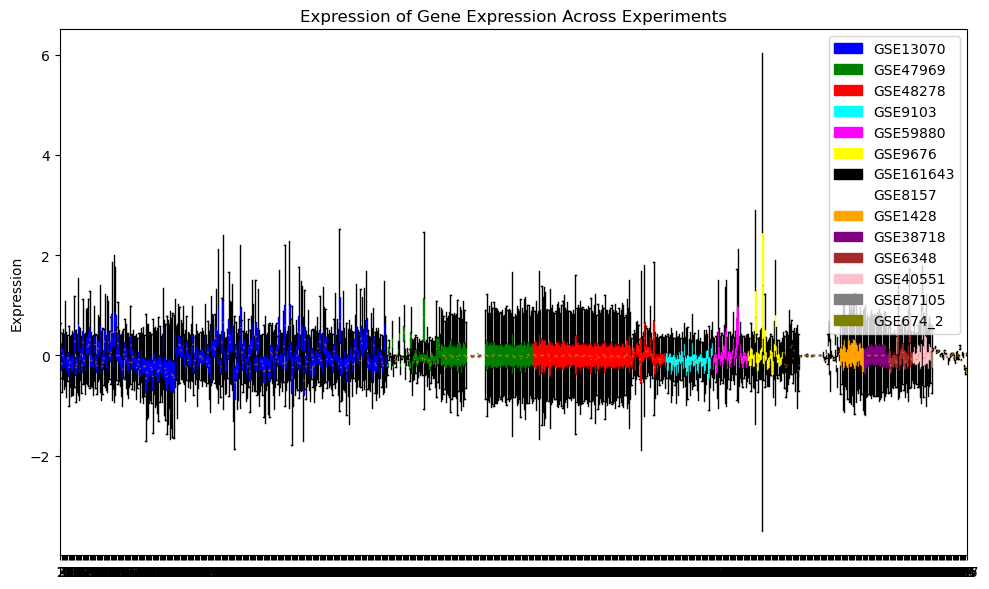

In [32]:
blot_expression(data_corrected, experiments, count_experiments, colors=colors, save=f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_adjusted_reCombat.png")

In [33]:
data_corrected = data_corrected.T


In [34]:
#blot_expression(data_corrected, experiments, count_experiments, colors=["blue", "green", "orange", "pink","red","purple"])

# Testing batch correction

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Set significance threshold (alpha level)

def plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05):
    # Plot histograms of p-values before and after batch correction
    plt.figure(figsize=(10, 5))
    plt.hist(p_values_before, bins=50, color='blue', alpha=0.5, label='Before Correction')
    plt.hist(p_values_after, bins=50, color='green', alpha=0.5, label='After Correction')
    plt.axvline(alpha, color='red', linestyle='--', label='Significance Threshold')
    plt.xlabel('p-value')
    plt.ylabel('Frequency')
    plt.title('Distribution of p-values before and after batch correction')
    plt.legend()
    plt.show()
    
    # Perform Kolmogorov-Smirnov test to compare distributions of p-values
    ks_stat, ks_p_value = ks_2samp(p_values_before, p_values_after)
    print("Kolmogorov-Smirnov test p-value:", ks_p_value)
    
    # Check if more p-values fall below the significance threshold after batch correction
    num_sig_before = np.sum(p_values_before < alpha)
    num_sig_after = np.sum(p_values_after < alpha)
    
    print("Number of significant p-values before correction:", num_sig_before)
    print("Number of significant p-values after correction:", num_sig_after)

def see_distribution(p_values_before, p_values_after):

    # Plot histograms of p-values before and after batch correction
    plt.figure(figsize=(10, 5))
    sns.histplot(p_values_before, bins=50, color='blue', kde=True, label='Before Correction')
    sns.histplot(p_values_after, bins=50, color='green', kde=True, label='After Correction')
    plt.axvline(alpha, color='red', linestyle='--', label='Significance Threshold')
    plt.xlabel('p-value')
    plt.ylabel('Density')
    plt.title('Distribution of p-values before and after batch correction')
    plt.legend()
    plt.show()


In [36]:
def get_ks_values_before_after(data, data_corrected, experiment_1, experiment_2):
    data_before = data.copy()
    data_before = data_before.T
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    ks_stat_before, ks_p_value_before = ks_2samp(group_a_samples_before, group_b_samples_before)

    data_corrected.reset_index(drop=True, inplace=True)

    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    _, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    ks_stat_after, ks_p_value_after = ks_2samp(group_a_samples_corrected, group_b_samples_corrected)

    return ks_p_value_before, ks_p_value_after




In [37]:
def get_p_values_before_after(data, data_corrected, experiment_1, experiment_2):
    data_before = data.copy()
    data_before = data_before.T
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)

    data_corrected.reset_index(drop=True, inplace=True)

    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    _, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)

    return p_values_before, p_values_after

In [38]:
experiment_list = experiments
experiments

['GSE13070',
 'GSE47969',
 'GSE48278',
 'GSE9103',
 'GSE59880',
 'GSE9676',
 'GSE161643',
 'GSE8157',
 'GSE1428',
 'GSE38718',
 'GSE6348',
 'GSE40551',
 'GSE87105',
 'GSE674_2']

In [39]:
experiment_1 = experiments[5]
experiment_2 = experiments[1]

In [40]:
cts_processed

,U48705,M87338,X51757,X69699,L36861,L13852,X55005,X79510,M21121,J02843,...,AW050627,AI654857,W22117,AI028241,AI571298,AA149545,C18318,AI219073,AI205180,AI363375
Sample,,,,,,,,,,,,,,,,,,,,,
GSM342608,-0.033316,-0.098851,-0.158225,-0.027953,-0.175503,-0.126077,-0.142240,-0.177167,-0.174901,-0.157694,...,-0.098886,-0.031900,-0.184850,-0.118837,-0.127069,0.234646,-0.169431,-0.176901,-0.159216,-0.146187
GSM342609,0.128274,-0.129065,-0.157747,-0.045498,-0.187506,-0.081067,-0.156031,-0.194102,-0.209033,-0.170279,...,-0.169018,-0.070851,-0.193689,-0.094757,-0.149434,0.586681,-0.195281,-0.203139,-0.177662,-0.130657
GSM342610,-0.005143,-0.122544,-0.157372,-0.020731,-0.170325,-0.072390,-0.158389,-0.187024,-0.191636,-0.182355,...,-0.152082,-0.113093,-0.190526,-0.080900,-0.145022,0.190049,-0.163623,-0.176971,-0.153249,-0.119550
GSM342611,0.041899,-0.105964,-0.174923,-0.104998,-0.204060,-0.136971,-0.154991,-0.203115,-0.199396,-0.181786,...,-0.201286,-0.090307,-0.184211,-0.098382,-0.158998,0.239365,-0.188690,-0.203444,-0.170135,-0.108492
GSM342614,-0.045441,-0.086414,-0.126433,0.015604,-0.161482,-0.096903,-0.141644,-0.164217,-0.161810,-0.151524,...,-0.026901,-0.032794,-0.172722,-0.083397,-0.139190,0.191877,-0.151899,-0.161732,-0.120837,-0.112067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM244612,1.654377,2.006635,14.824159,9.261710,8.350709,2.554144,13.315219,9.195453,0.224747,3.219094,...,-0.087395,-0.087395,-0.087395,-0.087395,-0.087395,-0.087395,-0.087395,-0.087395,-0.087395,-0.087395
GSM244613,1.366526,1.251114,14.599250,7.069174,9.055513,1.762132,9.343950,8.432528,0.416054,2.568473,...,-0.088918,-0.088918,-0.088918,-0.088918,-0.088918,-0.088918,-0.088918,-0.088918,-0.088918,-0.088918
GSM244614,1.855430,1.707956,15.777232,9.949969,9.628096,1.924292,11.378584,8.958147,0.514685,3.004858,...,-0.095984,-0.095984,-0.095984,-0.095984,-0.095984,-0.095984,-0.095984,-0.095984,-0.095984,-0.095984


In [41]:
cts

,Sample,U48705,M87338,X51757,X69699,L36861,L13852,X55005,X79510,M21121,...,AI571298,AA149545,C18318,AI219073,AI205180,AI363375,Experiment,Sex,Age,Status
0,GSM342608,870.599976,500.399994,165.000000,900.900024,67.400002,346.600006,255.300003,58.000000,70.800003,...,341.000000,2384.300049,101.699997,59.500000,159.399994,233.000000,GSE13070,Male,52.50,IRd
1,GSM342609,1635.300049,390.899994,252.199997,795.000000,108.300003,623.000000,260.500000,76.400002,4.200000,...,292.399994,3852.000000,70.699997,32.700001,155.899994,383.200012,GSE13070,Male,50.60,IRd
2,GSM342610,1006.799988,383.200012,198.199997,924.000000,129.399994,649.599976,192.800003,40.700001,16.200001,...,263.799988,2043.599976,165.000000,94.099998,220.100006,399.100006,GSE13070,Male,56.08,IRd � TZD
3,GSM342611,1215.800049,496.200012,160.600006,500.899994,18.799999,345.299988,257.600006,23.400000,41.500000,...,238.100006,2176.800049,93.599998,21.799999,183.899994,483.899994,GSE13070,Male,54.84,IRd � TZD
4,GSM342614,823.599976,561.500000,305.500000,1214.099976,81.300003,494.399994,208.199997,63.799999,79.199997,...,223.899994,2341.699951,142.600006,79.699997,341.299988,397.399994,GSE13070,Male,51.14,IRd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,GSM244612,1316.250000,1582.450000,11268.600000,7065.080000,6376.640000,1996.200000,10128.300000,7015.010000,235.884000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,65.10,NaN
773,GSM244613,966.504000,889.863000,9753.840000,4753.410000,6072.460000,1229.210000,6264.000000,5658.760000,335.332000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,68.40,NaN
774,GSM244614,1382.900000,1278.390000,11248.800000,7119.220000,6891.120000,1431.700000,8131.630000,6416.350000,432.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,65.90,NaN
775,GSM244615,1498.540000,1276.440000,10965.900000,6940.470000,7879.880000,1917.330000,7469.210000,6153.410000,440.064000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,67.30,NaN


In [42]:
p_values_before, p_values_after = get_p_values_before_after(data, data_corrected, experiment_1, experiment_2)

In [43]:
p_values_before

array([9.18301944e-008, 2.11707822e-088, 1.35561035e-137, ...,
       3.96571765e-077, 1.31862390e-083, 2.32527058e-010])

In [44]:
p_values_after

array([0.91862326, 0.6081651 , 0.00172032, ..., 0.99984493, 0.98690055,
       0.9941433 ])

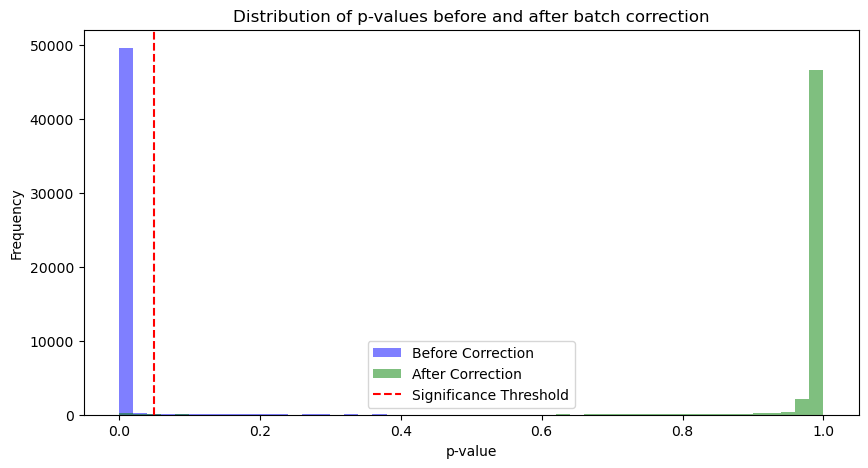

Kolmogorov-Smirnov test p-value: 0.0
Number of significant p-values before correction: 49858
Number of significant p-values after correction: 290


In [45]:
plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)


In [46]:
p_values_after

array([0.91862326, 0.6081651 , 0.00172032, ..., 0.99984493, 0.98690055,
       0.9941433 ])

## Getting all the experiments p_values


In [47]:
import itertools


In [48]:
expriments_pvalue_before=[]
expriments_pvalue_after=[]
combination_list = []
ks_stats =  []

for experiment_1, experiment_2 in itertools.combinations(experiment_list, 2):
    c = f"{experiment_1}-{experiment_2}"
    combination_list.append(c)
    print(c)
    #print("get_p_values_before_after")
    p_values_before, p_values_after = get_p_values_before_after(cts_processed.T, data_corrected, experiment_1, experiment_2)
    expriments_pvalue_before.append(p_values_before)
    expriments_pvalue_after.append(p_values_after)
    #print("ks_2samp")
    ks_stat, ks_p_value = ks_2samp(p_values_before, p_values_after)
    ks_stats.append({"combination":f"{experiment_1}-{experiment_2}","ks_stat":ks_stat, "ks_pvalue": ks_p_value})



GSE13070-GSE47969
GSE13070-GSE48278
GSE13070-GSE9103
GSE13070-GSE59880
GSE13070-GSE9676
GSE13070-GSE161643
GSE13070-GSE8157
GSE13070-GSE1428
GSE13070-GSE38718
GSE13070-GSE6348
GSE13070-GSE40551
GSE13070-GSE87105
GSE13070-GSE674_2
GSE47969-GSE48278
GSE47969-GSE9103
GSE47969-GSE59880
GSE47969-GSE9676
GSE47969-GSE161643
GSE47969-GSE8157
GSE47969-GSE1428
GSE47969-GSE38718
GSE47969-GSE6348
GSE47969-GSE40551
GSE47969-GSE87105
GSE47969-GSE674_2
GSE48278-GSE9103
GSE48278-GSE59880
GSE48278-GSE9676
GSE48278-GSE161643
GSE48278-GSE8157
GSE48278-GSE1428
GSE48278-GSE38718
GSE48278-GSE6348
GSE48278-GSE40551
GSE48278-GSE87105
GSE48278-GSE674_2
GSE9103-GSE59880
GSE9103-GSE9676
GSE9103-GSE161643
GSE9103-GSE8157
GSE9103-GSE1428
GSE9103-GSE38718
GSE9103-GSE6348
GSE9103-GSE40551
GSE9103-GSE87105
GSE9103-GSE674_2
GSE59880-GSE9676
GSE59880-GSE161643
GSE59880-GSE8157
GSE59880-GSE1428
GSE59880-GSE38718
GSE59880-GSE6348
GSE59880-GSE40551
GSE59880-GSE87105
GSE59880-GSE674_2
GSE9676-GSE161643
GSE9676-GSE8157
GSE9

In [49]:
# Convert lists to arrays
expriments_pvalue_before_array = np.array(expriments_pvalue_before)
expriments_pvalue_after_array = np.array(expriments_pvalue_after)

# Calculate average and standard deviation for p-values before and after
avg_p_values_before = np.mean(expriments_pvalue_before_array, axis=1)
std_p_values_before = np.std(expriments_pvalue_before_array, axis=1)
avg_p_values_after = np.mean(expriments_pvalue_after_array, axis=1)
std_p_values_after = np.std(expriments_pvalue_after_array, axis=1)

# Create DataFrame for KS test results
ks_stats_df = pd.DataFrame(ks_stats)


# Add columns for average and standard deviation of p-values before and after
ks_stats_df["avg_p_values_before"] = avg_p_values_before
ks_stats_df["std_p_values_before"] = std_p_values_before
ks_stats_df["avg_p_values_after"] = avg_p_values_after
ks_stats_df["std_p_values_after"] = std_p_values_after


In [50]:
ks_stats_df.drop(columns=["ks_stat", "ks_pvalue"])

,combination,avg_p_values_before,std_p_values_before,avg_p_values_after,std_p_values_after
0,GSE13070-GSE47969,0.005250,0.055435,0.988498,0.016322
1,GSE13070-GSE48278,0.009195,0.071957,0.991593,0.022781
2,GSE13070-GSE9103,0.055504,0.170547,0.972795,0.069516
3,GSE13070-GSE59880,0.124396,0.235399,0.979421,0.045332
4,GSE13070-GSE9676,0.015974,0.095256,0.976984,0.110820
...,...,...,...,...,...
86,GSE6348-GSE87105,0.023380,0.113335,0.894138,0.173728
87,GSE6348-GSE674_2,0.023959,0.116022,0.952560,0.142268
88,GSE40551-GSE87105,0.022406,0.111034,0.935592,0.095341
89,GSE40551-GSE674_2,0.027360,0.121275,0.925654,0.136255


In [51]:
ks_stats_df[ks_stats_df.isna().any(axis=1)]

,combination,ks_stat,ks_pvalue,avg_p_values_before,std_p_values_before,avg_p_values_after,std_p_values_after


In [52]:
ks_stats_df.to_csv(f"ttstat_difference_{technology}_experiments_before_after_recombat.csv")

Heatmap the similarity of the experiments

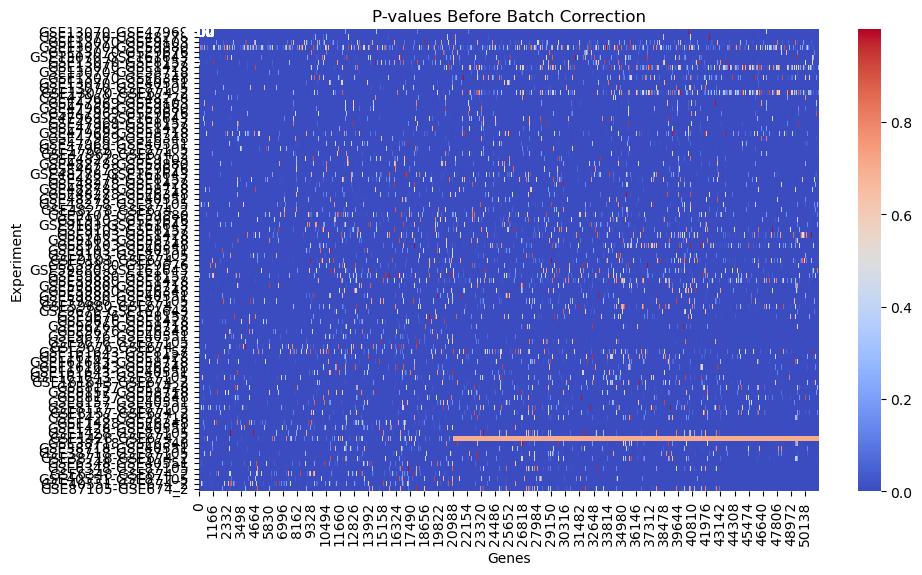

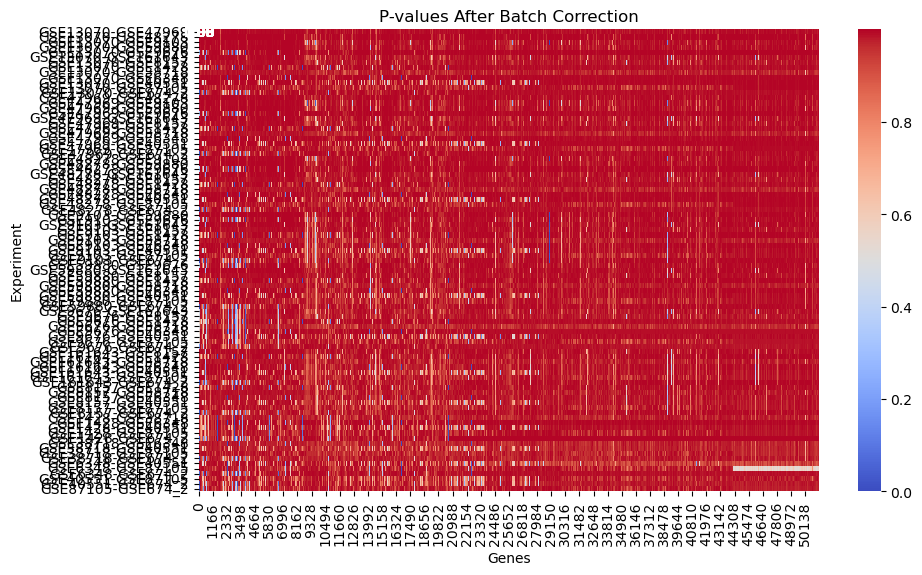

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert lists of p-values to a 2D NumPy array
p_values_before_array = np.array(expriments_pvalue_before)
p_values_after_array = np.array(expriments_pvalue_after)

# Create a heatmap for p-values before batch correction
plt.figure(figsize=(10, 6))
sns.heatmap(p_values_before_array, cmap='coolwarm', annot=True, fmt=".2f", yticklabels=combination_list)
plt.title('P-values Before Batch Correction')
plt.xlabel('Genes')
plt.ylabel('Experiment')
plt.savefig(f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_reCombatheatmap_before.png")
plt.show()

# Create a heatmap for p-values after batch correction
plt.figure(figsize=(10, 6))
sns.heatmap(p_values_after_array, cmap='coolwarm', annot=True, fmt=".2f", yticklabels=combination_list)
plt.title('P-values After Batch Correction')
plt.xlabel('Genes')
plt.ylabel('Experiment')
plt.savefig(f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_reCombatheatmap_after.png")
plt.show()

DE only in one experiment

In [54]:
import pandas as pd
experiment=experiment_1

def get_columns_to_keep_one(experiment):
    # Path to the CSV file
    file_path = f'/home/karen/Documents/phd/Data/Expression_data/Differential Expression/{experiment}_DDS.csv'
    
    # Read the CSV file
    de_genes = pd.read_csv(file_path, index_col=0)
    
    # Filter rows based on condition
    filtered_data = de_genes[(abs(de_genes['log2FoldChange']) > 1) & (de_genes['padj'] < 0.1)]
    
    # Extract column names from filtered data
    columns_to_keep = filtered_data["row"].str.strip().tolist()
    return columns_to_keep

# Assuming p_values_before is another DataFrame you want to filter columns from
# Replace p_values_before with your DataFrame name
#filtered_columns = p_values_before[columns_to_keep]

# Now you can work with the filtered columns DataFrame as needed


In [55]:
if technology =="RNAseq":
    columns_to_keep = get_columns_to_keep_one(experiment)

In [56]:
if technology =="RNAseq":
    len(columns_to_keep)

In [57]:
#filter_Bools = [(abs(de_genes['log2FoldChange']) > 1) & (de_genes['padj'] < 0.1)][0]

In [58]:
#p_values_after[x]

In [59]:
if technology =="RNAseq":

    DE_data = data.copy()
    DE_data_corrected = data_corrected.copy()
    
    DE_data= DE_data.T
    DE_data = DE_data[columns_to_keep]
    DE_data_corrected = DE_data_corrected[columns_to_keep]
    DE_data= DE_data.T
    
    p_values_before, p_values_after = get_p_values_before_after(DE_data, DE_data_corrected, experiment_1, experiment_2)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)


In [60]:
if technology =="RNAseq":
    DE_data_corrected

In [61]:
if technology =="RNAseq":
    DE_data

In [62]:
if technology =="RNAseq":
    DE_data.columns

In [63]:
if technology =="RNAseq":

    
    data_before = data.copy()
    data_before = data_before.T
    
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    group_a_samples_before.columns=data.index
    group_b_samples_before.columns=data.index
    group_a_samples_before = group_a_samples_before[columns_to_keep]
    group_b_samples_before = group_b_samples_before[columns_to_keep]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    
    
    data_corrected.reset_index(drop=True, inplace=True)
    
    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    
    group_a_samples_corrected.columns=data.index
    group_b_samples_corrected.columns=data.index
    group_a_samples_corrected = group_a_samples_corrected[columns_to_keep]
    group_b_samples_corrected = group_b_samples_corrected[columns_to_keep]
    t_statistic, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)


In [64]:
import random
if technology =="RNAseq":
    random_values = random.sample(de_genes["row"].tolist(), len(columns_to_keep))


In [65]:
if technology =="RNAseq":
    
    data_before = data.copy()
    data_before = data_before.T
    
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    group_a_samples_before.columns=data.index
    group_b_samples_before.columns=data.index
    group_a_samples_before = group_a_samples_before[random_values]
    group_b_samples_before = group_b_samples_before[random_values]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    
    
    data_corrected.reset_index(drop=True, inplace=True)
    
    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    
    group_a_samples_corrected.columns=data.index
    group_b_samples_corrected.columns=data.index
    group_a_samples_corrected = group_a_samples_corrected[random_values]
    group_b_samples_corrected = group_b_samples_corrected[random_values]
    t_statistic, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)

In [66]:
import pandas as pd
if technology =="RNAseq":
    
    # Path to the CSV file
    file_path_1 = f'/home/karen/Documents/phd/Data/Expression_data/Differential Expression/{experiment_1}_DDS.csv'
    file_path_2 = f'/home/karen/Documents/phd/Data/Expression_data/Differential Expression/{experiment_2}_DDS.csv'
    
    # Read the CSV file
    de_genes_1 = pd.read_csv(file_path_1, index_col=0)
    de_genes_2 = pd.read_csv(file_path_2, index_col=0)
    
    # Filter rows based on condition
    filtered_data_1 = de_genes_1[(abs(de_genes_1['log2FoldChange']) > 1) & (de_genes_1['padj'] < 0.1)]
    filtered_data_2 = de_genes_2[(abs(de_genes_2['log2FoldChange']) > 1) & (de_genes_2['padj'] < 0.1)]
    
    union_filter = pd.concat([filtered_data_1, filtered_data_2]).drop_duplicates()
    intersection_filter = pd.merge(filtered_data_1, filtered_data_2, on='row', how='inner')
    
    # Extract column names from filtered data
    union_keep = union_filter["row"].str.strip().tolist()
    intersection_keep = intersection_filter["row"].str.strip().tolist()


In [67]:
if technology =="RNAseq":
    
    
    data_before = data.copy()
    data_before = data_before.T
    
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    group_a_samples_before.columns=data.index
    group_b_samples_before.columns=data.index
    group_a_samples_before = group_a_samples_before[intersection_keep]
    group_b_samples_before = group_b_samples_before[intersection_keep]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    
    
    data_corrected.reset_index(drop=True, inplace=True)
    
    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    
    group_a_samples_corrected.columns=data.index
    group_b_samples_corrected.columns=data.index
    group_a_samples_corrected = group_a_samples_corrected[intersection_keep]
    group_b_samples_corrected = group_b_samples_corrected[intersection_keep]
    t_statistic, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)

Checking the same experiment before and after

In [68]:
if technology =="RNAseq":
    
    t_statistic, p_values_a = ttest_ind(group_a_samples_before, group_a_samples_corrected)
    t_statistic, p_values_b = ttest_ind(group_b_samples_before, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_a, p_values_b, alpha = 0.05)

# Cluster data before and after

In [69]:
metadata_short =  pd.DataFrame({
    'Experiment': experiment_order,
    'Age': age_order,
    'Sample': sample_order
})
metadata_short.set_index('Sample', inplace=True)
metadata_short

,Experiment,Age
Sample,,
GSM342608,GSE13070,MiddleAge
GSM342609,GSE13070,MiddleAge
GSM342610,GSE13070,MiddleAge
GSM342611,GSE13070,MiddleAge
GSM342614,GSE13070,MiddleAge
...,...,...
GSM244612,GSE9676,Old
GSM244613,GSE9676,Old
GSM244614,GSE9676,Old


In [70]:
data_corrected.index = cts["Sample"]
cts_processed.index = cts["Sample"]

In [71]:
adjuested_data_full = pd.concat([data_corrected, metadata_short], axis=1)

In [72]:
unadjested_data_full= pd.concat([cts_processed, metadata_short], axis=1)

In [73]:
adjuested_data_full.columns[10:]

Index(['X75208', 'L38487', 'M33318', 'NM_005505', 'NM_015140', 'NM_052871',
       'NM_080735', 'NM_138957', 'NM_145004', 'NM_138796',
       ...
       'W22117', 'AI028241', 'AI571298', 'AA149545', 'C18318', 'AI219073',
       'AI205180', 'AI363375', 'Experiment', 'Age'],
      dtype='object', length=51268)

In [74]:
cts_2 = cts.set_index("Sample")
cts_2

,U48705,M87338,X51757,X69699,L36861,L13852,X55005,X79510,M21121,J02843,...,AI571298,AA149545,C18318,AI219073,AI205180,AI363375,Experiment,Sex,Age,Status
Sample,,,,,,,,,,,,,,,,,,,,,
GSM342608,870.599976,500.399994,165.000000,900.900024,67.400002,346.600006,255.300003,58.000000,70.800003,168.000000,...,341.000000,2384.300049,101.699997,59.500000,159.399994,233.000000,GSE13070,Male,52.50,IRd
GSM342609,1635.300049,390.899994,252.199997,795.000000,108.300003,623.000000,260.500000,76.400002,4.200000,191.600006,...,292.399994,3852.000000,70.699997,32.700001,155.899994,383.200012,GSE13070,Male,50.60,IRd
GSM342610,1006.799988,383.200012,198.199997,924.000000,129.399994,649.599976,192.800003,40.700001,16.200001,65.500000,...,263.799988,2043.599976,165.000000,94.099998,220.100006,399.100006,GSE13070,Male,56.08,IRd � TZD
GSM342611,1215.800049,496.200012,160.600006,500.899994,18.799999,345.299988,257.600006,23.400000,41.500000,127.199997,...,238.100006,2176.800049,93.599998,21.799999,183.899994,483.899994,GSE13070,Male,54.84,IRd � TZD
GSM342614,823.599976,561.500000,305.500000,1214.099976,81.300003,494.399994,208.199997,63.799999,79.199997,145.000000,...,223.899994,2341.699951,142.600006,79.699997,341.299988,397.399994,GSE13070,Male,51.14,IRd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM244612,1316.250000,1582.450000,11268.600000,7065.080000,6376.640000,1996.200000,10128.300000,7015.010000,235.884000,2498.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,65.10,NaN
GSM244613,966.504000,889.863000,9753.840000,4753.410000,6072.460000,1229.210000,6264.000000,5658.760000,335.332000,1764.670000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,68.40,NaN
GSM244614,1382.900000,1278.390000,11248.800000,7119.220000,6891.120000,1431.700000,8131.630000,6416.350000,432.760000,2197.460000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GSE9676,Female,65.90,NaN


In [75]:
adjuested_data_full["Age"]=cts_2["Age"]

adjuested_data_full

,U48705,M87338,X51757,X69699,L36861,L13852,X55005,X79510,M21121,J02843,...,W22117,AI028241,AI571298,AA149545,C18318,AI219073,AI205180,AI363375,Experiment,Age
Sample,,,,,,,,,,,,,,,,,,,,,
GSM342608,-1.932922,0.184247,0.007480,-0.124343,0.719133,-0.321052,0.280277,0.204439,0.205784,0.422185,...,0.132968,-0.205033,0.102265,-0.326898,0.223452,0.122180,-0.122646,-0.139711,GSE13070,52.50
GSM342609,0.914609,-1.231138,0.040869,-0.585964,-0.027564,0.774299,-0.617545,-0.853704,-0.498989,-0.002508,...,-0.073595,0.044458,-0.052426,0.809303,-0.241475,-0.186364,-0.213463,-0.023862,GSE13070,50.60
GSM342610,-1.436446,-0.925659,0.067085,0.065661,1.041235,0.985451,-0.771055,-0.411442,-0.139777,-0.410001,...,0.000324,0.188031,-0.021912,-0.470836,0.327909,0.121363,-0.093268,0.058989,GSE13070,56.08
GSM342611,-0.607485,-0.148975,-1.159882,-2.151431,-1.057409,-0.586154,-0.549872,-1.416797,-0.299991,-0.390801,...,0.147899,0.006900,-0.118577,-0.311669,-0.122933,-0.189940,-0.176405,0.141482,GSE13070,54.84
GSM342614,-2.146581,0.766864,2.230043,1.021641,1.591373,0.388909,0.319061,1.013511,0.476085,0.630400,...,0.416388,0.162158,0.018430,-0.464935,0.538766,0.300561,0.066314,0.114810,GSE13070,51.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM244612,1.708436,0.597657,-1.159295,1.297905,1.045859,1.459585,3.526321,3.221477,-0.801564,1.769470,...,0.039919,0.038289,0.036740,0.040127,0.039429,0.037750,0.037564,0.034719,GSE9676,65.10
GSM244613,-0.984965,-2.141692,-1.629989,-1.285400,2.335933,0.091776,-3.204698,1.755974,-0.438364,0.482434,...,-0.009567,-0.009419,-0.009142,-0.009549,-0.009560,-0.009328,-0.009296,-0.008741,GSE9676,68.40
GSM244614,3.589671,-0.485288,0.835317,2.108831,3.383992,0.371828,0.243863,2.765636,-0.251110,1.345676,...,-0.239107,-0.230711,-0.221965,-0.239968,-0.236793,-0.227699,-0.226651,-0.210328,GSE9676,65.90


In [76]:
adjuested_data_full.to_csv(f"/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/{technology}_abundances_adjusted_recombat.csv")

In [76]:
#unadjested_data_full.to_csv(f"/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/{technology}_All_abundances_unadjusted_2_recombat.csv")

Looking at reCombat plotting

In [77]:
X = data_corrected.fillna(0, inplace=False).values 

In [78]:
X

array([[-1.93292152,  0.18424676,  0.00747953, ...,  0.12218036,
        -0.12264611, -0.13971076],
       [ 0.91460863, -1.23113798,  0.04086929, ..., -0.18636357,
        -0.21346287, -0.02386168],
       [-1.43644562, -0.92565884,  0.06708522, ...,  0.12136292,
        -0.09326812,  0.05898876],
       ...,
       [ 3.58967107, -0.48528769,  0.83531746, ..., -0.22769869,
        -0.22665068, -0.21032793],
       [ 4.04539788, -0.85018078, -1.71954071, ..., -0.30658194,
        -0.30516726, -0.28314842],
       [-0.57356339, -0.98305029, -1.21772369, ...,  0.02200759,
         0.02189488,  0.02018659]])

In [79]:

# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}
if technology =="RNAseq":
    category_map = {'GSE164471': -1, 'GSE152558': 0, 'GSE157585': 1, 'GSE167186':2, "GSE60590":3, "GSE129643":4}
elif technology == "microarray":
    category_map = {'GSE13070':-6, 'GSE47969':-5, 'GSE48278':-4, 'GSE9103':-3, 'GSE59880':-2, 'GSE9676':-1, 'GSE161643':0, 'GSE8157':1, 'GSE1428':2, 'GSE38718':3, 'GSE6348':4, 'GSE40551':5, 'GSE87105':6, 'GSE674_2':7}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab20.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)


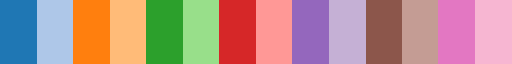

In [80]:
custom_cmap

Using tSNE


In [81]:
from sklearn.manifold import TSNE
X = data_corrected.values 
tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(X)
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
x=tSNE_result[:,0]
y=tSNE_result[:,1]

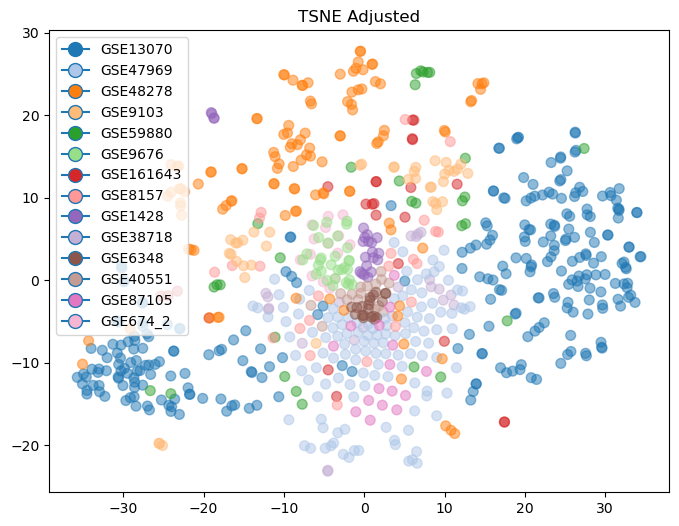

In [82]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Adjusted')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_reCombat_by_experiment_new_norm.png"
plt.savefig(save)

Using PCA

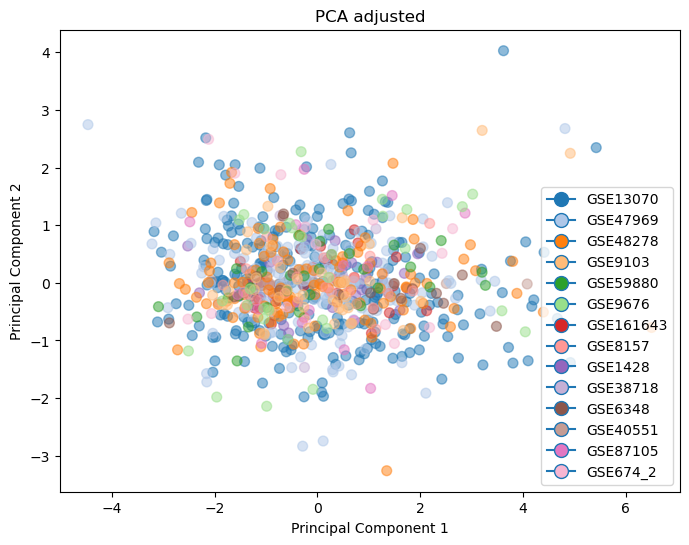

In [83]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_reCombat_by_experiment.png"
plt.savefig(save)

Lookign at the age

In [84]:



# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(age_order)}
category_map = {'Young': -1,  'MiddleAge': 0, 'Old': 1}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_age_order = [category_map[experiment] for experiment in age_order]
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(age_order))
colors = [tab20_colors[i] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)


In [85]:
pd.DataFrame(age_order).value_counts()

MiddleAge    571
Young        128
Old           78
Name: count, dtype: int64

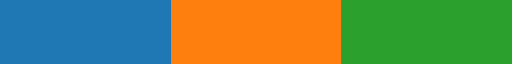

In [86]:
custom_cmap

tSNE

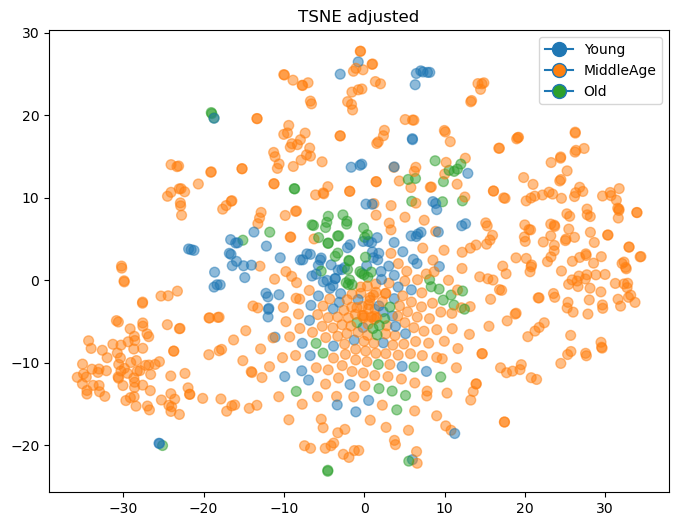

In [87]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE adjusted')

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_reCombat_by_age.png"
plt.savefig(save)
#plt.savefig("TSNE_Scatter_Plot_Age_reCombat.jpg")

PCA

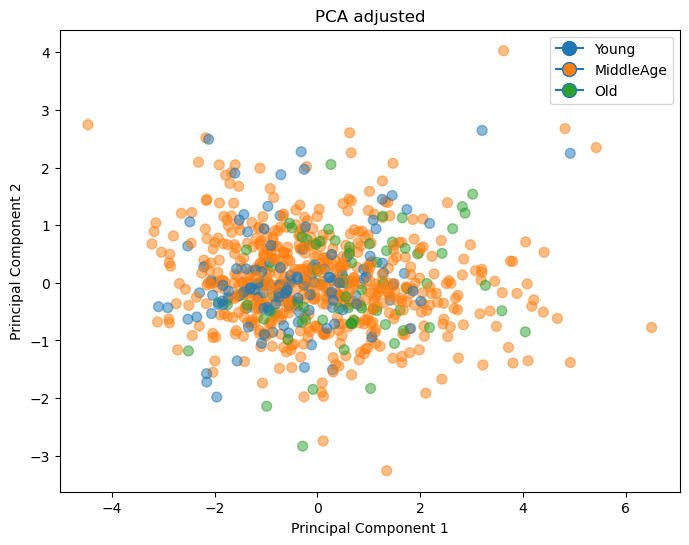

In [88]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_reCombat_by_age.png"
plt.savefig(save)
# plt.savefig("PCA_Scatter_Plot_Age_reCombat.jpg")

# Unadjusted

In [89]:
X = cts_processed.values 


tSNE by experiment

In [90]:

tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(X)
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
x=tSNE_result[:,0]
y=tSNE_result[:,1]

In [91]:
# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}
if technology =="RNAseq":
    category_map = {'GSE164471': -1, 'GSE152558': 0, 'GSE157585': 1, 'GSE167186':2, "GSE60590":3, "GSE129643":4}
elif technology == "microarray":
    category_map = {'GSE13070':-6, 'GSE47969':-5, 'GSE48278':-4, 'GSE9103':-3, 'GSE59880':-2, 'GSE9676':-1, 'GSE161643':0, 'GSE8157':1, 'GSE1428':2, 'GSE38718':3, 'GSE6348':4, 'GSE40551':5, 'GSE87105':6, 'GSE674_2':7}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab20.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i ] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)

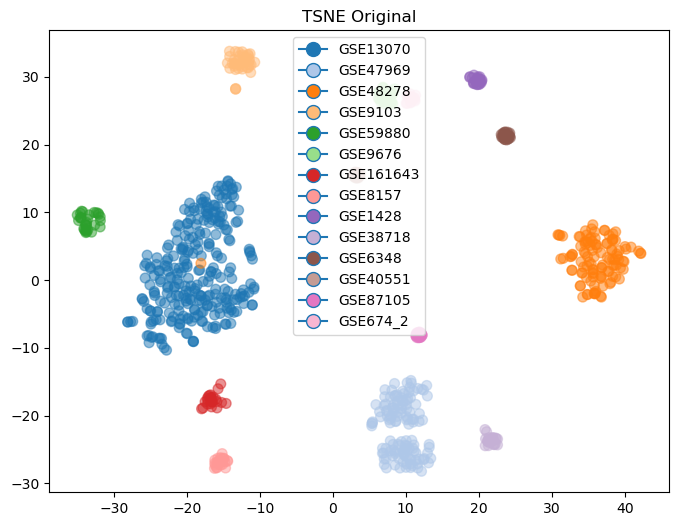

In [92]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Original')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_Original_by_experiment_reCombat_new_norm.png"
plt.savefig(save)
#plt.savefig("TSNE_Scatter_Plot_Experiment_Original.jpg")

PCA by experiment original

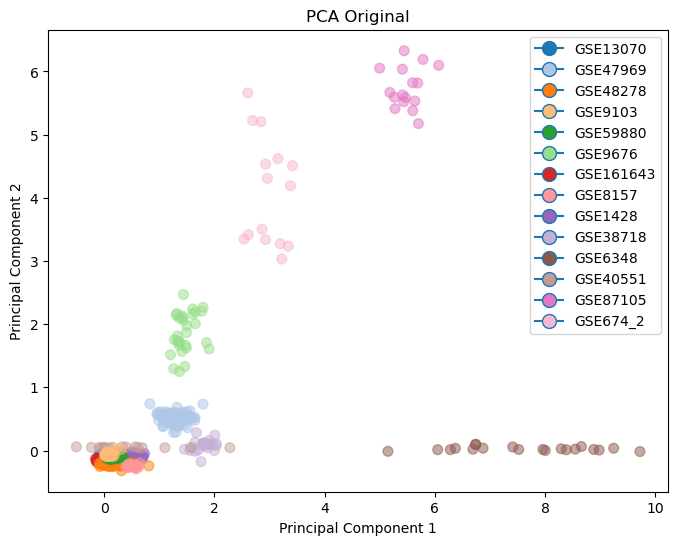

In [93]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA Original')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_Original_by_experiment_reCombat.png"
plt.savefig(save)
#plt.savefig("PCA_Scatter_Plot_Experiment_Original.jpg")

By age

In [94]:

# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(age_order)}
category_map = {'Young': -1,  'MiddleAge': 0, 'Old': 1}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_age_order = [category_map[experiment] for experiment in age_order]
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(age_order))
colors = [tab20_colors[i % 20] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)

TSNE by age

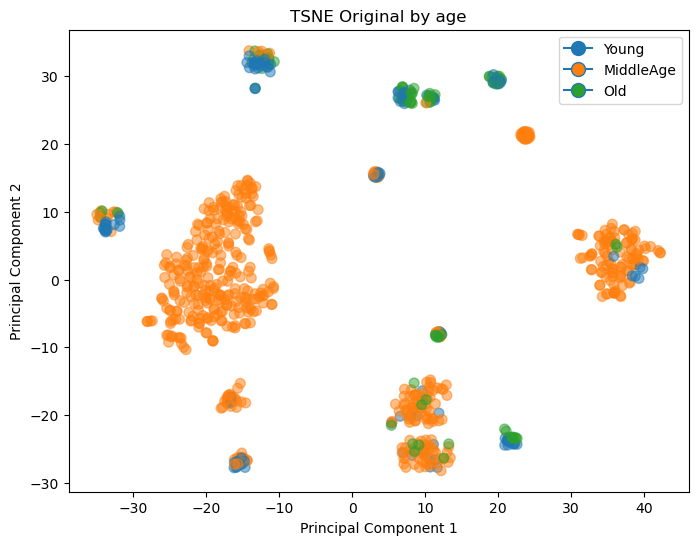

In [95]:


# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Original by age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_Original_by_age_reCombat.png"
plt.savefig(save)
#plt.savefig("TSNE_Scatter_Plot_Age_Original.jpg")

PCA by age original

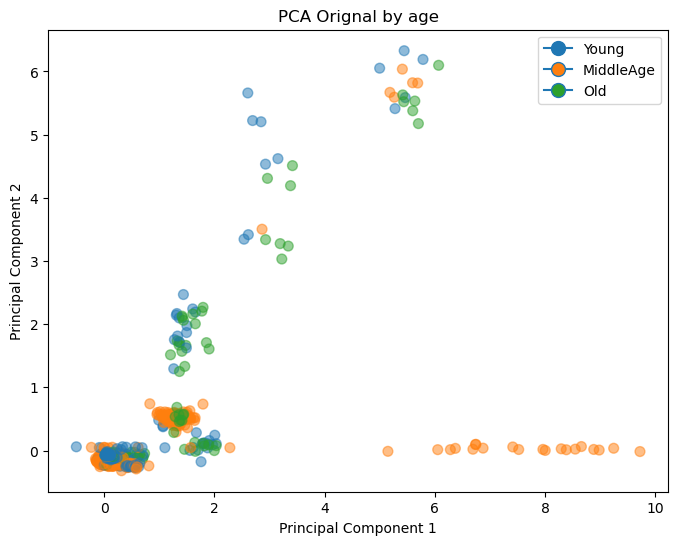

In [96]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA Orignal by age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_Original_by_age_reCombat.png"
plt.savefig(save)
#plt.savefig("PCA_Scatter_Plot_Age_Original.jpg")

UMAP